In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
np.random.seed(0)
n_samples= 100
symbols = ['AAPL','GOOGLE','MSFT','AMZN','TSLA','FB']
prices = np.random.uniform(50,4000,n_samples)
volume = np.random.randint(100000,500000,n_samples)
market_cap = np.random.uniform(1e10,2e12,n_samples) 

In [18]:
data = pd.DataFrame({
    'nome ação':np.random.choice(symbols,n_samples),
    'preço ação R$':prices,
    'qtde cotas':volume,
    'valor de mercado R$ -(Bilhões)':market_cap
})
data

,nome ação,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões)
0,FB,2217.813341,452893,8.459500e+11
1,GOOGLE,2874.997997,264610,1.106703e+11
2,AAPL,2430.915335,108286,7.373373e+11
3,FB,2202.288573,471938,4.308967e+10
4,AAPL,1723.436457,204299,4.691772e+11
...,...,...,...,...
95,AAPL,773.605880,182727,1.466071e+12
96,FB,2366.726092,422953,1.007731e+11
97,AMZN,129.424807,233193,4.262225e+11
98,GOOGLE,3324.313115,276425,5.809609e+11


C:\Users\47341687843\AppData\Local\Temp\ipykernel_15740\1052664179.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['nome ação'],y=data['preço ação R$'], palette=cores)


<Axes: xlabel='nome ação', ylabel='preço ação R$'>

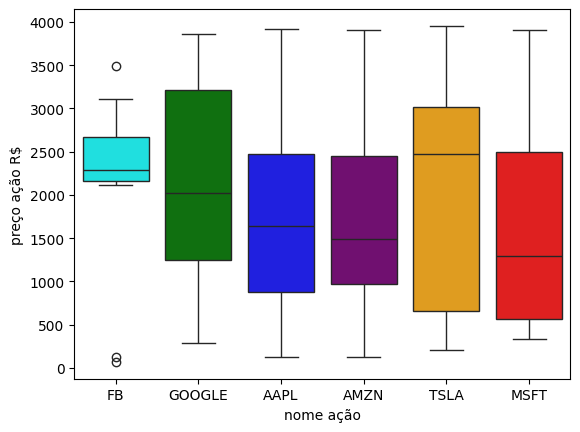

In [19]:
cores = {
    'AAPL': 'blue',
    'GOOGLE': 'green',
    'MSFT': 'red',
    'AMZN': 'purple',
    'TSLA': 'orange',
    'FB': 'cyan'
}
sns.boxplot(x=data['nome ação'],y=data['preço ação R$'], palette=cores)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   nome ação                       100 non-null    object 
 1   preço ação R$                   100 non-null    float64
 2   qtde cotas                      100 non-null    int32  
 3   valor de mercado R$ -(Bilhões)  100 non-null    float64
dtypes: float64(2), int32(1), object(1)
memory usage: 2.9+ KB


In [21]:
data.describe()

,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões)
count,100.000000,100.000000,1.000000e+02
mean,1917.535666,291214.520000,1.032814e+12
std,1144.528360,118360.448216,5.704925e+11
min,68.547131,101913.000000,1.011016e+10
25%,862.922472,192171.000000,4.664786e+11
50%,1896.549900,274163.500000,1.024639e+12
75%,2753.708854,401936.750000,1.496561e+12
max,3954.076660,494956.000000,1.984869e+12


In [22]:
# Verificar valores ausentes
print(data.isnull().sum())

# Codificar variáveis categóricas usando pd.get_dummies
data_encoded = pd.get_dummies(data, columns=['nome ação'], drop_first=True)

# Visualizar os dados após a codificação
print(data_encoded.head())


nome ação                         0
preço ação R$                     0
qtde cotas                        0
valor de mercado R$ -(Bilhões)    0
dtype: int64
   preço ação R$  qtde cotas  valor de mercado R$ -(Bilhões)  nome ação_AMZN  \
0    2217.813341      452893                    8.459500e+11           False   
1    2874.997997      264610                    1.106703e+11           False   
2    2430.915335      108286                    7.373373e+11           False   
3    2202.288573      471938                    4.308967e+10           False   
4    1723.436457      204299                    4.691772e+11           False   

   nome ação_FB  nome ação_GOOGLE  nome ação_MSFT  nome ação_TSLA  
0          True             False           False           False  
1         False              True           False           False  
2         False             False           False           False  
3          True             False           False           False  
4         False       

In [23]:
from sklearn.preprocessing import StandardScaler

# Selecionar as características para o agrupamento
features = ['preço ação R$', 'qtde cotas', 'valor de mercado R$ -(Bilhões)']

# Padronizar os dados
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_encoded[features])

# K-Means com n_clusters = 4
kmeans_4 = KMeans(n_clusters=4, random_state=0)
data_encoded['Cluster_4'] = kmeans_4.fit_predict(data_scaled)

# Visualizar os clusters
print(data_encoded[['preço ação R$', 'qtde cotas', 'valor de mercado R$ -(Bilhões)', 'Cluster_4']].head())


   preço ação R$  qtde cotas  valor de mercado R$ -(Bilhões)  Cluster_4
0    2217.813341      452893                    8.459500e+11          2
1    2874.997997      264610                    1.106703e+11          1
2    2430.915335      108286                    7.373373e+11          1
3    2202.288573      471938                    4.308967e+10          2
4    1723.436457      204299                    4.691772e+11          1


In [24]:
kmeans_5 = KMeans(n_clusters=5, random_state=0)
data_encoded['Cluster_5'] = kmeans_5.fit_predict(data_scaled)


In [25]:
kmeans_8 = KMeans(n_clusters=8, random_state=0)
data_encoded['Cluster_8'] = kmeans_8.fit_predict(data_scaled)


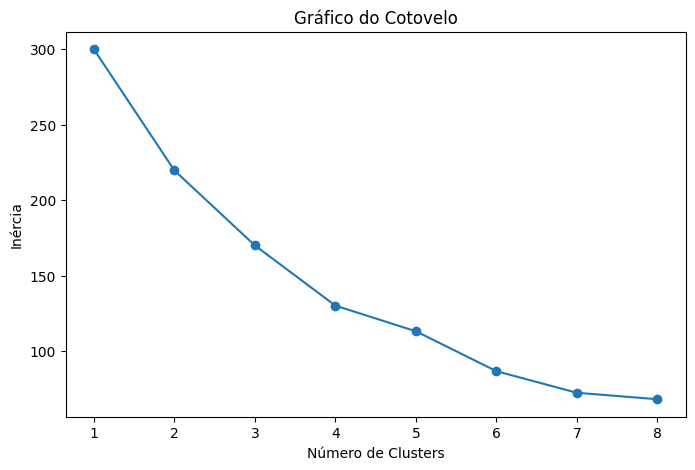

In [26]:
# Gráfico do Cotovelo
inertia = []
for k in range(1, 9):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plotar o gráfico do cotovelo
plt.figure(figsize=(8, 5))
plt.plot(range(1, 9), inertia, marker='o')
plt.title('Gráfico do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.show()


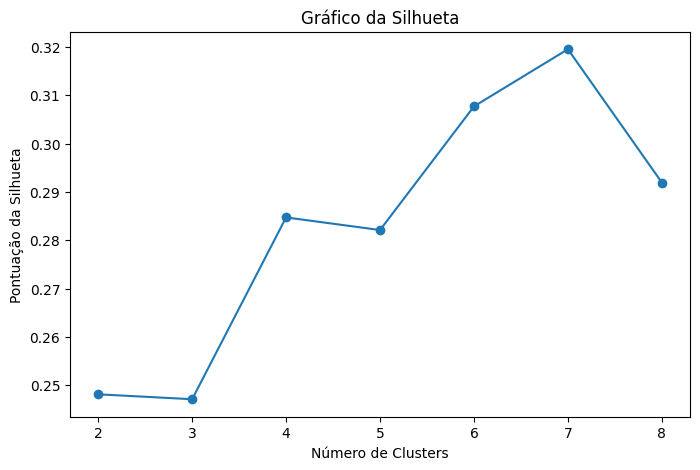

In [27]:
from sklearn.metrics import silhouette_score

# Calcular a pontuação de silhueta para diferentes valores de clusters
silhouette_scores = []
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(data_scaled)
    score = silhouette_score(data_scaled, labels)
    silhouette_scores.append(score)

# Plotar o gráfico da silhueta
plt.figure(figsize=(8, 5))
plt.plot(range(2, 9), silhouette_scores, marker='o')
plt.title('Gráfico da Silhueta')
plt.xlabel('Número de Clusters')
plt.ylabel('Pontuação da Silhueta')
plt.show()


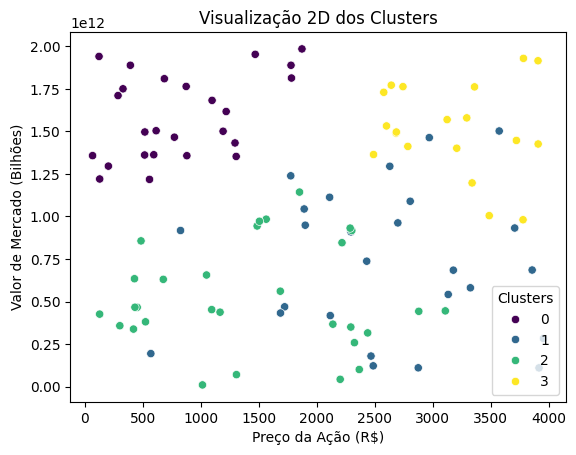

In [28]:
sns.scatterplot(
    x=data_encoded['preço ação R$'],
    y=data_encoded['valor de mercado R$ -(Bilhões)'],
    hue=data_encoded['Cluster_4'],
    palette='viridis'
)
plt.title('Visualização 2D dos Clusters')
plt.xlabel('Preço da Ação (R$)')
plt.ylabel('Valor de Mercado (Bilhões)')
plt.legend(title='Clusters')
plt.show()


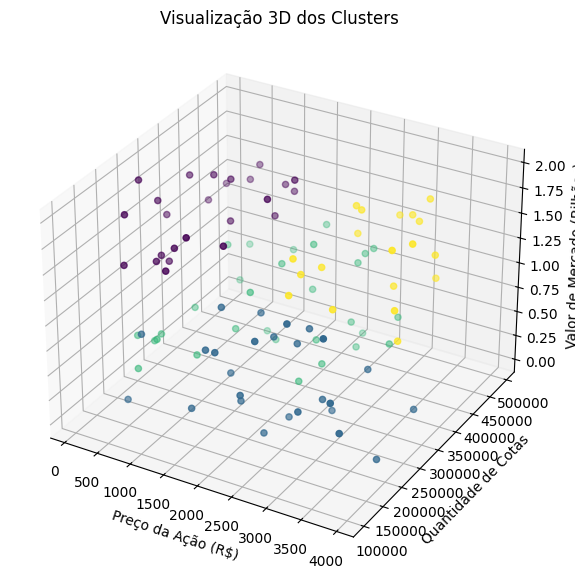

In [29]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Adicionar dados
ax.scatter(
    data_encoded['preço ação R$'],
    data_encoded['qtde cotas'],
    data_encoded['valor de mercado R$ -(Bilhões)'],
    c=data_encoded['Cluster_4'],
    cmap='viridis'
)

# Títulos e eixos
ax.set_title('Visualização 3D dos Clusters')
ax.set_xlabel('Preço da Ação (R$)')
ax.set_ylabel('Quantidade de Cotas')
ax.set_zlabel('Valor de Mercado (Bilhões)')
plt.show()


In [ ]:
# Qual a maior vantagem do aprendizado não supervisionado diante o 
# aprendizado supervisionado?
"""
A maior vantagem do aprendizado não supervisionado é a capacidade de 
identificar padrões em dados sem a necessidade de rótulos, economizando 
tempo e custos com rotulagem. Ele é ideal para explorar dados não 
estruturados, descobrir agrupamentos, reduzir dimensionalidade e 
gerar insights iniciais em cenários onde os rótulos não estão 
disponíveis.
"""